In [280]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import gudhi             as gh

from matplotlib import cm
from mpl_toolkits import mplot3d
from PIL import Image

# Here we import the mnist dataset. 
Downloaded from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [266]:
path = '/Users/luketrujillo/Desktop/Senior_year/machine_learning/mnist_playground/mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)

# Recall the structure of the mnist data.
It is a tuple where the first entry contians the training data, and the second entry contains the testing data.

In [267]:
train_images.shape

(60000, 28, 28)

There are 60,000 28x28 images. 

In [270]:
train_images[0].shape

(28, 28)

We can grab one and plot its grayscale. 

In [274]:
img = Image.fromarray(train_images[2])
img.show()

Since it's an image, we can turn it into a surface. Specifically, it will be the graph of a two variable function, where the height is the grayscale value and the inputs are the image pixel coordinates.

In [275]:
Xs = np.linspace(0, 28, 28) #initialize our coordinates
Ys = np.linspace(0, 28, 28)
xdata = [Xs, Ys] #our x-y coordinates
i,j = np.meshgrid(*xdata, indexing = "ij")  #creates the 28x28 grid
train_matrices = train_images[10]

Zs = train_matrices

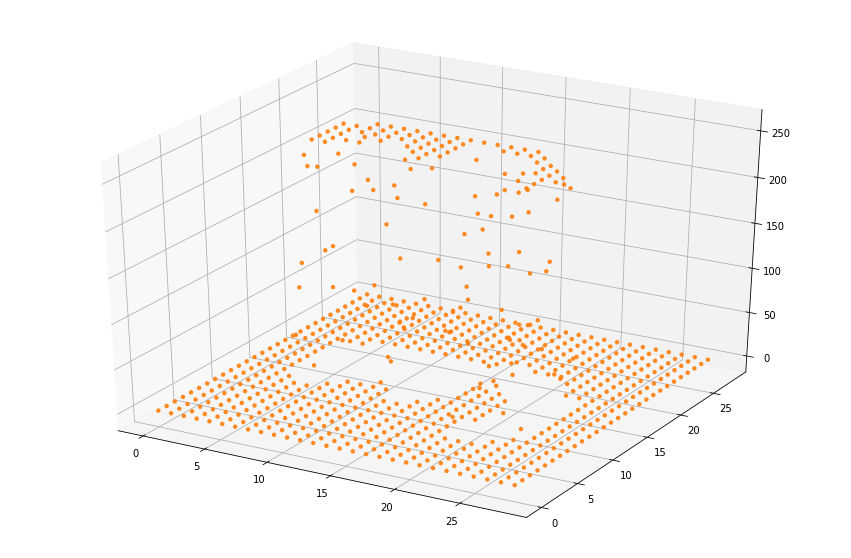

In [277]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.set_facecolor('none')
c = [s['color'] for s in plt.rcParams['axes.prop_cycle']]
ax.scatter(i, j, Zs,  color=c[1], linewidth=0, alpha=0.9)

# Persistence Diagrams
At this point we can create a general function which plots this surface and computes the persistence diagram of the three dimensional surface.

In [12]:
#Given an image, we can compute the 3D coordinates which correspond to the surface representation of the image 
def surface_coordinates(image, lowerbd): #nonzero surface data
    X = [] #initialize our coordinates
    Y = []
    Z = []
    for j in range(0, 28):
        for k in range(0, 28):
            if image[j][k] > lowerbd:
                X.append(j)
                Y.append(k)
                Z.append(image[j][k])
    return X, Y, Z

## How much noise?

We create a lower bound parameter since we don't want to create persistence diagrams which take in points that are zero. This isn't useful information; what we want it to capture the homology of the main structure, which is the surface at nonzero z values. With that said, we may not even want to consider points which are at a height less than 100. Thus the parameter was set so that I could vary it and see how the persistence diagram changed for a fixed image. Thus we're just trying to figure out how much noise to add to the persistence diagrams computations. After testing a few times, I found that the persistence diagram stops changing so much when we set lowerbd to 150 or 175; so either of these values will be fine. 

In [294]:
#Given a surface, we want its persistence diagrams. We can do this pretty directly using its 3D coordinates.

def surface_pers_diag(X,Y,Z, plotPers = False):
    points = []
    for i in range(0, len(X)):
        points.append([ X[i], Y[i], Z[i] ])                                    #Creates a list of triples of 3D points 
    rips = gudhi.RipsComplex(points, max_edge_length=42)                       #Creates ripser complex
    simplex_tree = rips.create_simplex_tree(max_dimension=3)                   #creates simplices
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0) #computes persistence diagram
    
    if plotPers:
        gudhi.plot_persistence_barcode(diag) #plots the points
        plot.show()                          #graphs the points
    return diag

In [295]:
#We put together our previous two functions to create a general one which plots the surface and the persistence diagram.

def mnist_plot_and_pers_diargam(image, lowerbd, show3Dplot = False, plotPers = False): #the lowerbd is the minimum grayscale value which we'll care about
    if show3Dplot:                  #Set plotme = True if you want to see the 3D representation of the surface.
        Xs = np.linspace(0, 28, 28) #initialize our coordinates
        Ys = np.linspace(0, 28, 28)
        xdata = [Xs, Ys] #our x-y coordinates
        i,j = np.meshgrid(*xdata, indexing = "ij")  #creates the 28x28 grid

        fig = plt.figure(figsize=(15, 10)) #creates a large plotting area
        ax = plt.axes(projection='3d')     #creates axes                               

        cm = plt.get_cmap("rainbow")       #color theme is "rainbow"; can change e.g. "spring", "gist_gray", "hsv"                          
        col = []                           #we want color to vary by height. So we create different colors for each point.
        for m in range(28):                #iterating through all of our points,
            for n in range(28):
                col.append( cm(float(image[m][n])/255)) #we set the color for each point by normalizing by max height 255.
        ax.scatter(i, j, image, c=col) #plots the surface
        ax.view_init(elev = 15, azim=40)
    
    X,Y,Z = surface_coordinates(image, lowerbd)        #creates the coordinates of the surface
    diag = surface_pers_diag(X,Y,Z, plotPers)           #plots the persistence diagram of the surface
    return diag

In [303]:
image = train_images[1]
int(image[16][6])
mydiag = mnist_plot_and_pers_diargam(image, 50)
mydiag

[(2, (14.177446878757825, 15.165750888103101)),
 (2, (12.24744871391589, 13.038404810405298)),
 (2, (10.295630140987, 10.488088481701515)),
 (1, (2.23606797749979, 10.04987562112089)),
 (1, (9.055385138137417, 12.727922061357855)),
 (1, (9.899494936611665, 12.806248474865697)),
 (1, (9.055385138137417, 11.789826122551595)),
 (1, (9.055385138137417, 11.357816691600547)),
 (1, (7.810249675906654, 9.433981132056603)),
 (1, (9.433981132056603, 11.0)),
 (1, (13.076696830622021, 14.594519519326424)),
 (1, (11.575836902790225, 12.84523257866513)),
 (1, (10.63014581273465, 11.832159566199232)),
 (1, (2.23606797749979, 3.0)),
 (1, (8.06225774829855, 8.774964387392123)),
 (1, (11.224972160321824, 11.916375287812984)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4

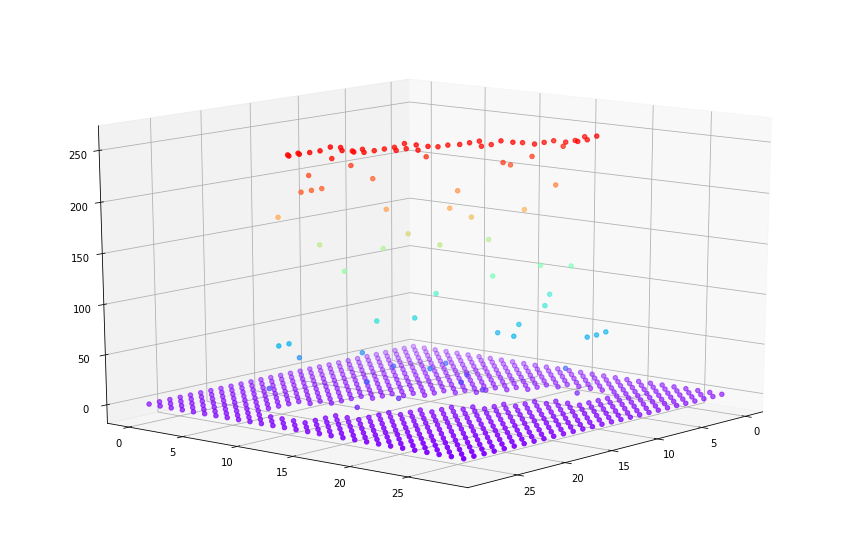

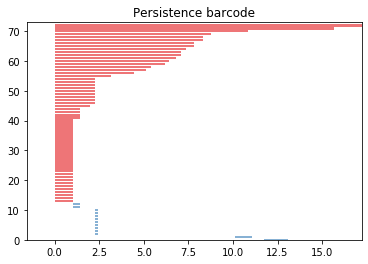

73

In [287]:
image = train_images[3]
mydiag = mnist_plot_and_pers_diargam(image, 175, plotme = True)
len(mydiag)

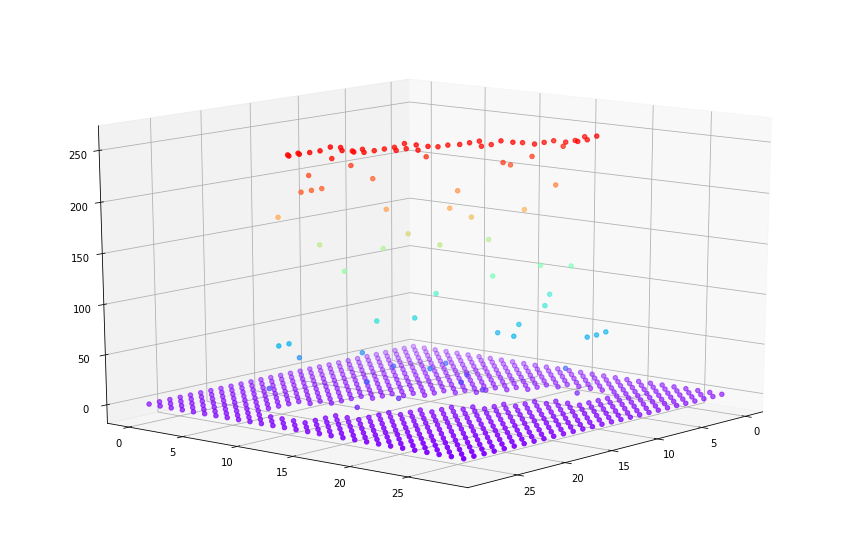

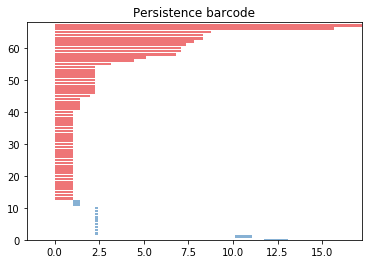

73

In [288]:
image = train_images[3]
diag = mnist_plot_and_pers_diargam(image, 200, plotme = True)
len(mydiag)

## We now iterate over the entire dataset. 
That is, we compute all of the persistence diagrams. We're interested in the multiset of points in the persistence diagrams, and will store this in a format which is required for it to be understood as input for our neural network in the next step. 

The format will be a dictionary. Each key will correspond to a persistence diagram. The associated value will be a list of numpy arrays. Each array will correspond to a dimension of the persistence diagram. Since in our case we're only using two dimensions, each value will be a list of two numpy arrays, corresponding to the 1st and 2nd dimensions of the persistence diagram.

In [296]:
#Helper function which will help organize the persistence diagram values in each dimension.
def extract_pers_dims(pers_diag, dim): 
    first = 0                          #helps later bc numpy is weird
    points_of_dim = np.empty(2)        #intialize the output array
    for pers_tuple in pers_diag:       #iterate over the points of dimension "dim"
        dimension = pers_tuple[0]
        point = pers_tuple[1]
        
        if dimension == dim:                                           #if the dimension of our point is "dim"
            current_array = np.array([point[0], point[1]])
            if first == 0:                                             #if this is the FIRST point of dimension "dim"
                points_of_dim = current_array                          #overwrite previous value of points_of dim
            else: 
                points_of_dim = np.stack(points_of_dim, current_array) #stack onto points of dim
    return points_of_dim 

In [305]:
image = train_images[1]
extract_pers_dims(image, 0)

IndexError: invalid index to scalar variable.

In [298]:
dict = {}                                #initialize the dict we will populate with pers diagrams
num_images = len(train_images)           #calculate length of train set (we know it's 60000 but let's not get sloppy)
for image_index in range(0, num_images): #iterate over the images
    print(image_index)
    image = train_images[image_index]    #extract "i-th" image
    
    pers_dimensions = []                 #initialize list 
    diag = mnist_plot_and_pers_diargam(image, 150)
    
    pers_dimensions = [extract_pers_dims(diag, 0), extract_pers_dims(diag,1)]
    
    dict["pers_diag_" + str(image_index)] = pers_dimensions

In [301]:
dict["pers_diag_10"]

[array([0., 1.]), array([13.07669683, 13.26649916])]

## Now we'll try to create a neural network to classify the persistence diagrams. 
To do this, we'll use Perslay developed by Mathieu Carriere: https://github.com/MathieuCarriere/perslay/blob/master/tutorial/tutorialPersLay.ipynb
which resulted in the work https://arxiv.org/abs/1904.09378 . The paper unites previous research focused on vectorizing persistence diagrams so that they can be fed into a neural network in a meaningful way.

To make this work, we borrow code from Carriere's Github. The code is extremely well written in such a way that it can accept labeled persistence diagrams from anywhere; it only requires that we reformat them in a logical way. 

In [289]:
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow import random_uniform_initializer as rui

#Below we initiate perslay.
from perslay.perslay import perslay_channel
from perslay.preprocessing import preprocess
from perslay.visualisation import visualise_diag
from perslay.experiments   import load_diagfeatlabels, generate_diag_and_features, single_run, perform_expe
